In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing df

data = pd.read_csv('train_boston (1).csv')
data

,index,id,data,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zip_code,lat,lon,sqft_living15,sqft_lot15,price
0,6243,8850000509,9/23/14,2,1.50,1620,1444,2.0,0,0,...,1080,540,2007,0,98144,47.5892,-122.309,1660,1642,525000
1,8986,191100410,6/20/14,3,2.75,2470,10125,2.0,0,0,...,2470,0,1960,2012,98040,47.5651,-122.223,2290,10125,970500
2,9419,6632300040,4/25/15,2,1.00,1140,7435,1.0,0,0,...,1140,0,1952,1990,98125,47.7300,-122.310,1320,9385,327000
3,10155,7517500310,5/6/15,3,1.00,1460,6198,1.5,0,0,...,1460,0,1916,0,98107,47.6626,-122.361,2280,5160,775000
4,10436,7454000990,9/24/14,2,1.00,670,6720,1.0,0,0,...,670,0,1942,0,98126,47.5151,-122.372,710,6720,304950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17271,11964,4353700200,12/3/14,2,1.75,1810,7523,1.0,0,0,...,1170,640,1962,1980,98027,47.5695,-122.087,2090,7523,501000
17272,21575,1931300412,4/16/15,3,2.25,1190,1200,3.0,0,0,...,1190,0,2008,0,98103,47.6542,-122.346,1180,1224,475000
17273,5390,9187200285,5/5/14,6,1.75,2920,5000,2.5,0,0,...,2780,140,1908,0,98122,47.6024,-122.295,2020,5000,823000
17274,860,2359300030,5/8/15,3,1.00,910,5212,1.0,0,0,...,910,0,1951,0,98115,47.6742,-122.284,1520,6300,565000


# Data cleaning

In [3]:
# dropping index, lat & lon column

data = data.drop(['index',' lat',' lon'], axis=1)

In [4]:
data.shape

(17276, 19)

In [5]:
data.dtypes

 id                 int64
 data              object
 bedrooms           int64
 bathrooms        float64
 sqft_living        int64
 sqft_lot           int64
 floors           float64
 waterfront         int64
 view               int64
 condition          int64
 grade              int64
 sqft_above         int64
 sqft_basement      int64
 yr_built           int64
 yr_renovated       int64
 zip_code           int64
 sqft_living15      int64
 sqft_lot15         int64
 price              int64
dtype: object

In [6]:
data.columns

Index([' id', ' data', ' bedrooms', ' bathrooms', ' sqft_living', ' sqft_lot',
       ' floors', ' waterfront', ' view', ' condition', ' grade',
       ' sqft_above', ' sqft_basement', ' yr_built', ' yr_renovated',
       ' zip_code', ' sqft_living15', ' sqft_lot15', ' price'],
      dtype='object')

In [7]:
# changing columns names (getting rid of spaces)

data.columns = data.columns.str.replace(' ', '')

In [8]:
# correcting column name

data = data.rename(columns={"data": "date"})

In [9]:
# setting id as index

data = data.set_index('id')

In [10]:
data.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zip_code',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [11]:
# chaning date's data type

data['date']= pd.to_datetime(data['date'])

In [12]:
data.dtypes

date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zip_code                  int64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [13]:
# Changing data types

data[['bathrooms','bedrooms','view','waterfront','floors','condition','grade','zip_code','yr_built','yr_renovated']] = data[['bathrooms','bedrooms','view','waterfront','floors','condition','grade','zip_code','yr_built','yr_renovated']].astype('object')

In [14]:
data.dtypes

date             datetime64[ns]
bedrooms                 object
bathrooms                object
sqft_living               int64
sqft_lot                  int64
floors                   object
waterfront               object
view                     object
condition                object
grade                    object
sqft_above                int64
sqft_basement             int64
yr_built                 object
yr_renovated             object
zip_code                 object
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [15]:
# Checking for nulls

data.isna().sum()

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zip_code         0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [16]:
#tried bucketing zip codes but the model didn't improve...

#zip_avg = data.groupby('zip_code').agg({'price': np.mean})
#mapping = {5: zip_avg[zip_avg['price'] > 1200000].index, 4: zip_avg[(zip_avg['price'] <= 1200000) & (zip_avg['price'] > 650000)].index, 3: zip_avg[(zip_avg['price'] <= 650000) & (zip_avg['price'] > 400000)].index, 2: zip_avg[(zip_avg['price'] <= 400000) & (zip_avg['price'] > 250000)].index, 1: zip_avg[zip_avg['price'] <= 250000].index}
#data['neighborhoods'] = data['zip_code'].apply(lambda x: [key for key, zip_codes in mapping.items() if x in zip_codes][0])
#data 

In [17]:
data.dtypes

date             datetime64[ns]
bedrooms                 object
bathrooms                object
sqft_living               int64
sqft_lot                  int64
floors                   object
waterfront               object
view                     object
condition                object
grade                    object
sqft_above                int64
sqft_basement             int64
yr_built                 object
yr_renovated             object
zip_code                 object
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [18]:
data_num = data.select_dtypes(np.number)
data_cat = data.select_dtypes(np.object)

# EDA

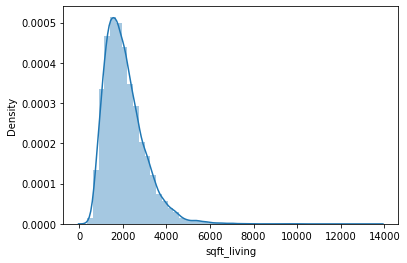

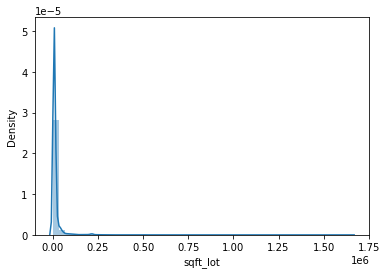

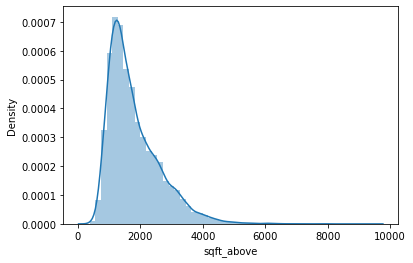

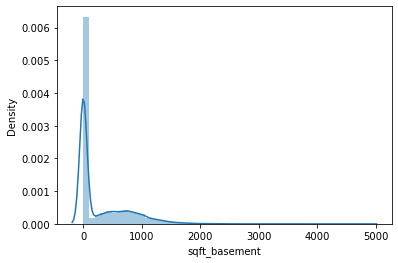

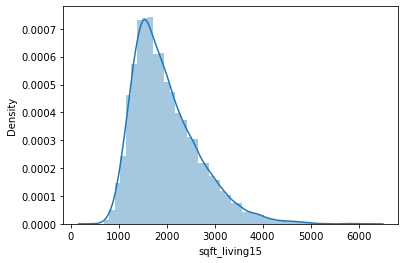

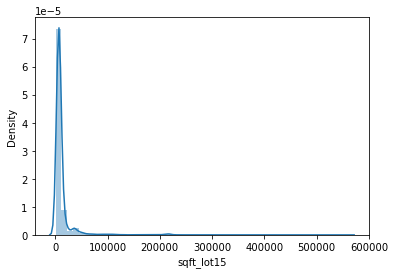

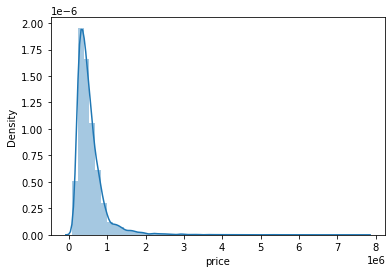

In [19]:
# Checking data distributions

for column in data_num:
    sns.distplot(data_num[column])
    plt.show()

In [20]:
data.describe()

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
count,17276.000000,1.727600e+04,17276.000000,17276.000000,17276.000000,17276.000000,1.727600e+04
mean,2084.123177,1.508619e+04,1791.053542,293.069634,1988.115825,12648.988307,5.408807e+05
std,924.621058,4.147208e+04,830.925292,445.900684,687.864331,25805.732442,3.732611e+05
min,370.000000,5.200000e+02,370.000000,0.000000,460.000000,651.000000,8.000000e+04
25%,1420.000000,5.030000e+03,1190.000000,0.000000,1490.000000,5100.000000,3.210202e+05
50%,1920.000000,7.599000e+03,1570.000000,0.000000,1840.000000,7614.000000,4.500000e+05
75%,2556.250000,1.069850e+04,2220.000000,560.000000,2360.000000,10093.250000,6.442125e+05
max,13540.000000,1.651359e+06,9410.000000,4820.000000,6210.000000,560617.000000,7.700000e+06


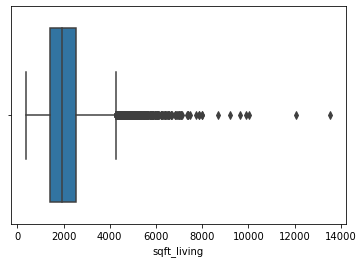

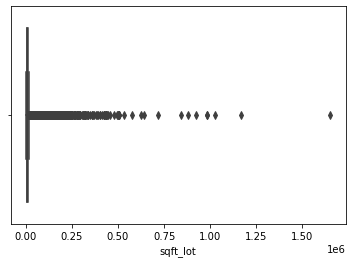

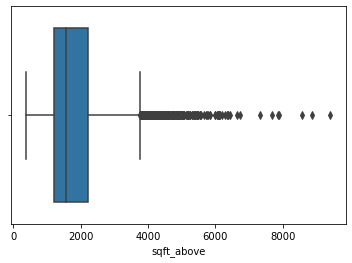

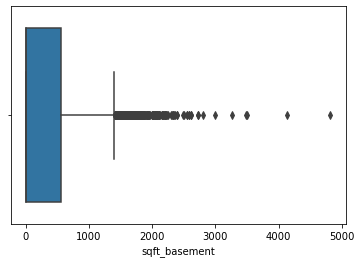

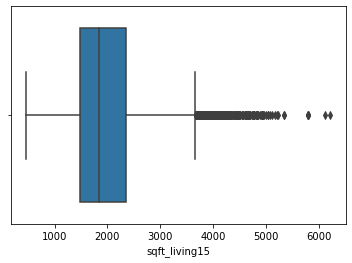

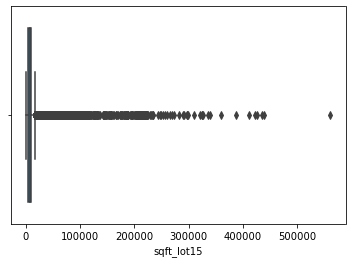

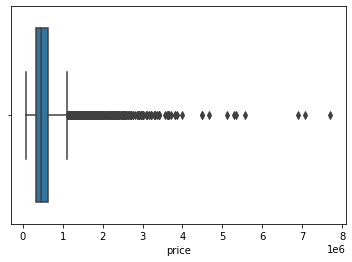

In [21]:
# checking for outliers

for column in data_num:
    sns.boxplot(data_num[column])
    plt.show()

In [22]:
# Saving data into a csv to work on EDA (Tabelau)
data.to_csv(r'\DATA.csv')

In [23]:
# Checking data correlation

data_corr = data_num.corr(method='spearman')
data_corr

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
sqft_living,1.000000,0.307574,0.844028,0.327502,0.747668,0.288640,0.645069
sqft_lot,0.307574,1.000000,0.276877,0.034232,0.363834,0.923287,0.081348
sqft_above,0.844028,0.276877,1.000000,-0.165489,0.697959,0.259850,0.541710
sqft_basement,0.327502,0.034232,-0.165489,1.000000,0.128566,0.028845,0.254142
sqft_living15,0.747668,0.363834,0.697959,0.128566,1.000000,0.371972,0.573796
sqft_lot15,0.288640,0.923287,0.259850,0.028845,0.371972,1.000000,0.068976
price,0.645069,0.081348,0.541710,0.254142,0.573796,0.068976,1.000000


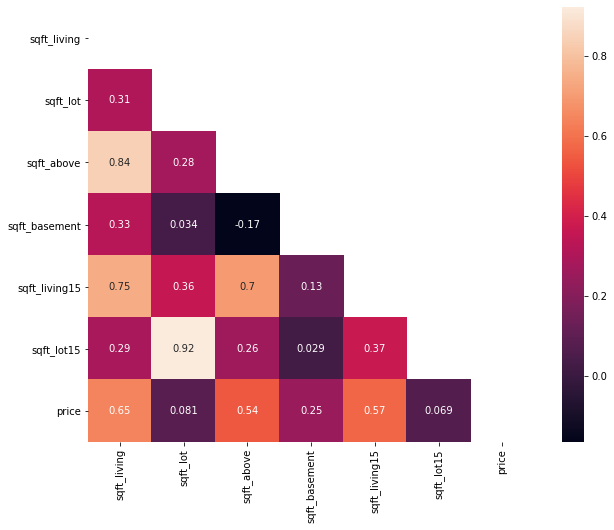

In [24]:
# visualising data correlation

mask = np.zeros_like(data_corr)

mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(data_corr, mask=mask, annot=True)
plt.show()

In [25]:
# checking data correlation with target variable

data.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.705890
sqft_above       0.607706
sqft_living15    0.585543
sqft_basement    0.331291
sqft_lot         0.092304
sqft_lot15       0.089045
Name: price, dtype: float64

In [26]:
data.dtypes

date             datetime64[ns]
bedrooms                 object
bathrooms                object
sqft_living               int64
sqft_lot                  int64
floors                   object
waterfront               object
view                     object
condition                object
grade                    object
sqft_above                int64
sqft_basement             int64
yr_built                 object
yr_renovated             object
zip_code                 object
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

# Dealing with outliers

In [27]:
# removing outliers

for column in data_num:
    upper = np.percentile(data_num[column],75)
    lower = np.percentile(data_num[column],25)
    iqr = upper - lower
    upper_limit = upper + 1.5 * iqr
    lower_limit = lower - 1.5 * iqr
    clean_data_num = data_num[(data_num[column]>lower_limit) & (data_num[column]<upper_limit)]

# Feature scaling

In [28]:
#log boxcox

def boxcox_transform(clean_data_num):
    numeric_cols = clean_data_num.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        clean_data_num[column] = np.where(clean_data_num[column]<=0, np.NAN, clean_data_num[column]) 
        clean_data_num[column] = clean_data_num[column].fillna(clean_data_num[column].mean())
        transformed_data, ci = stats.boxcox(clean_data_num[column])
        clean_data_num[column] = transformed_data
        _ci[column] = ci
    return clean_data_num, _ci

In [29]:
clean_data_num, _ci = boxcox_transform(clean_data_num)

In [30]:
# adding clean numericals & categoricals

table = data_cat.merge(clean_data_num, right_index=True, left_index=True)
table

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zip_code,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,
1000102,6,3,2,0,0,3,7,1991,0,98002,17.765557,4.372856,4.136630,200.247817,4.650963,4.169158,41.395570
1000102,6,3,2,0,0,3,7,1991,0,98002,17.765557,4.372856,4.136630,200.247817,4.650963,4.169158,41.934284
1000102,6,3,2,0,0,3,7,1991,0,98002,17.765557,4.372856,4.136630,200.247817,4.650963,4.169158,41.395570
1000102,6,3,2,0,0,3,7,1991,0,98002,17.765557,4.372856,4.136630,200.247817,4.650963,4.169158,41.934284
1200019,4,1.75,1,0,0,4,8,1947,0,98166,17.108736,4.540159,3.950893,242.125706,4.726864,4.336707,48.371540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9842300036,3,1,1,0,0,4,7,1964,0,98126,15.270264,4.215112,3.983716,200.247817,4.436447,4.067768,44.568749
9842300095,5,2,1.5,0,0,3,7,1927,0,98126,16.063047,4.215364,4.036119,200.247817,4.458633,4.067859,43.499189
9842300540,3,1,1,0,0,4,7,1942,0,98126,14.601756,4.213342,3.814840,124.110001,4.543954,4.083910,42.903628


# Dummifying

In [31]:
# Encoding categorical values

data2 = pd.get_dummies(table, drop_first=True)
data2

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price,bedrooms_2,bedrooms_3,bedrooms_4,...,zip_code_98146,zip_code_98148,zip_code_98155,zip_code_98166,zip_code_98168,zip_code_98177,zip_code_98178,zip_code_98188,zip_code_98198,zip_code_98199
id,,,,,,,,,,,,,,,,,,,,,
1000102,17.765557,4.372856,4.136630,200.247817,4.650963,4.169158,41.395570,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000102,17.765557,4.372856,4.136630,200.247817,4.650963,4.169158,41.934284,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000102,17.765557,4.372856,4.136630,200.247817,4.650963,4.169158,41.395570,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000102,17.765557,4.372856,4.136630,200.247817,4.650963,4.169158,41.934284,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1200019,17.108736,4.540159,3.950893,242.125706,4.726864,4.336707,48.371540,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9842300036,15.270264,4.215112,3.983716,200.247817,4.436447,4.067768,44.568749,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9842300095,16.063047,4.215364,4.036119,200.247817,4.458633,4.067859,43.499189,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9842300540,14.601756,4.213342,3.814840,124.110001,4.543954,4.083910,42.903628,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
data2.shape

(16568, 316)

# ML model - LR

In [33]:
# TESTING & RUNNING THE MODEL

# splitting our data

X = data2.drop(['price','sqft_lot15'], axis=1)
y = data2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
predictions = model.predict(X_test)

In [36]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [37]:
print("The R2_score is",r2_score(y_test, predictions))
print ("The mean_absolute_error is", mean_absolute_error(y_test, predictions))
print("The mean_squared error is", mean_squared_error(y_test, predictions, squared=False))

The R2_score is 0.8514734962992707
The mean_absolute_error is 1.031075428043854
The mean_squared error is 1.4128332183681158


<AxesSubplot:ylabel='price'>

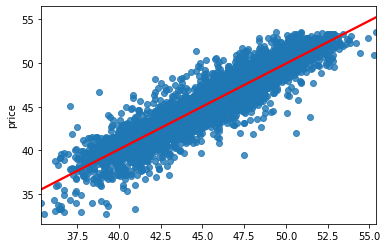

In [38]:
sns.regplot(predictions, y_test, line_kws={"color": "red"})

# ML model - KNN

In [39]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [40]:
knn.score(X_test, y_test)

0.48598512531619087

# Random forest

In [42]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [43]:
regressor.score(X_test, y_test)

0.7497108930081811

In [44]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.3583204165043614
Mean Squared Error: 3.363719599432799
Root Mean Squared Error: 1.834044601265956
